## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo V - Redes neurais auto-associativas e geradoras</span>


### <span style="color:darkred">Exercícios (com soluções)</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

## Parte 1 - Exercícios Essenciais

### Exercício 1)

Auto-encoders são apropriados para tarefas de aprendizado não supervisionado, em que os dados de entrada são reconstruídos e uma representação compacta destes dados é aprendida. Em relação a esse método, qual afirmação está incorreta?

a) A função de custo Mean Square Error deve ser utilizada com o propósito de medir a eficiência do aprendizado da rede, em que se considera seu potencial de obter imagens com alto grau de similaridade em relação às imagens de entrada.

b) Podemos utilizar um auto-encoder para ser treinado com exemplos não rotulados e reaproveitar somente o Encoder para formar uma CNN com adição de novas camadas para a predição com posterior fine-tuning. 

<font color='red'>c) Auto-encoders overcomplete obtém naturalmente códigos compactos e de baixa dimensionalidade, similar a projeção PCA nos principais componentes considerando dimensionalidade menor do que a da entrada.</font>

d) Denoising auto-encoderes são arquiteturas que podem ser utilizadas para duas tarefas simultaneamente após o seu treinamento. O primeiro deles é fornecer espaço de características que representam um conjunto de dados. O segundo propósito é funcionar como um filtro para remoção de ruídos.

**Justificativa:** A única alternativa incorreta é a de que autoencoders overcomplete obtem naturalmente códigos de baixa dimensionalidade. Ao contrário, aprendem uma transformação para dimensionalidades igual ou superior à da entrada.

---

### Exercício 2)

É correto afirmar sobre a principal tarefa realizada pela família de métodos do tipo Autoencoder

(a) Mapeia os dados de entrada em um espaço latente que melhor permita uma boa classificação dos dados de treinamento, sendo o foco principal do aprendizado aumento de acurácia<br>
<font color='red'>(b) Mapeia os dados de entrada em um espaço latente, e posteriormente aprende uma reconstrução desse espaço latente novamente no espaço de entrada, sendo o foco principal do aprendizado obter um espaço latente compacto e representativo.<br></font>
(c) Mapeia os dados de entrada no espaço de saída num problema similar à regressão, em que temos informações a priori sobre como reconstruir os dados de entrada<br>
(d) Mapeia os dados de entrada com principal objetivo de eliminar o ruído dos dados e portanto é útil para tarefas de limpeza de dados. <br>

**Justificativa:** (a) é incorreta pois não é possível garantir acurácia, já que esses métodos não possuem acesso a rótulos de classes. (c) é incorreta pois o método não possui informações a priori sobre como reconstruir os dados de entrada, finalmente (d) é incorreta pois o objetivo principal dos métodos autoencoder não é eliminar ruído, ainda que isso seja um efeito colateral especificamente do método denoising autoencoder, mas não de toda a família de métodos.

### Exercício 3)

Autoencoders do tipo Overcomplete possuem dimensão latente superior a da entrada. Como garantir o aprendizado sem que haja uma cópia simples dos dados?

(a) Utilizando mais camadas, projetando um Autoencoder Overcomplete Profundo que permita obter uma camada latente com maior qualidade<br>
(b) Substituindo a função de custo de perda ou erro quadrático pela função de custo de entropia cruzada<br>
(d) Utilizando normalização do tipo Batch ou Layer para que os dados sejam modificados ao longo da rede neural, assim evitando que haja uma cópia direta da entrada para o código<br>
<font color='red'>(d) Impondo uma restrição na projeção do código que penalize o uso de todas as dimensões do espaço latente e privilegie projeções esparsas para uma dada instância.<br></font>

**Justificativa:** O aprendizado de autoencoder em geral funciona impondo uma restrição no código. No caso dos overcomplete isso funciona impondo restrições no aprendizado do código como por exemplo a de esparsidade via regularização e/ou dropout.


### Exercício 4)

Em geral qual modelo: Variational Autoencoder (VAE) ou Generative Adversarial Network (GAN) é mais difícil de treinar e por que?

<font color='red'>a) GANs, pois estamos tentando otimizar 2 modelos simultâneamente e de forma adversarial<br></font>
b) VAEs, pois sua perda é complexa de calcular<br>
c) GANs, pois necessitam de muita aumentação de dados<br>
d) VAEs, pois precisam aprender distribuições de dados para dois modelos (encoder e decoder)<br>

**Justificativa**: A alternativa (a) está correta, muitas garantias teóricas que temos dos nossos otimizadores simplesmente desaparecem no cenário de 2 modelos oponentes sendo otimizados ao mesmo tempo, na verdade o mero fato dos dados de entrada do discriminador mudarem ao longo do treino já aumenta a complexidade e instabilidade do treinamento dos modelos. A alternativa (b) está errada pois a perda do VAE não é particularmente complexa ou custosa de calcular. Já na (c) enquanto a área do uso de Data Augmentation em GANs está sendo muito estudada, sabemos com certeza que não é necessário DA para otimizar GANs, e que DA demais pode piorar o treino. Por fim na letra (d) esse fato não é sozinho um grande problema para a convergência de VAEs e enquanto GANs não têm que aprender a distribuição explicitamente, elas terminam tendo que aprendê-la de maneira implícita, com o gerador tendendo a conseguir amostrar a distribuição e o discriminador tendo que aprender a diferenciar se um dado faz ou não parte daquela distribuição. Como uma nota adicional, em aprendizado por reforço alguns algoritmos ficam mais estáveis ao serem modificados para aprender uma distribuição em vez de aprender uma única saída.

---

### Exercício 5)

Carregue a base de dados `smartphone_activity_dataset.csv`, que possui 6 classes, conforme abaixo. Utilizaremos os primeiros 70% exemplos como treinamento e o restante como teste.

Defina as sementes `seed(1)` e `set_seed(2)`. Logo após, projete e instancie um Encoder (apenas encoder, não é necessário um AE aqui) com as seguintes camadas, sendo que, após a entrada, todas terão ativação tangente hiperbólica:
* Entrada
* Densa com metade das dimensões da entrada (use a divisão inteira //2)
* Densa com um quarto das dimensões da entrada (use a divisão inteira //4)
* Densa com 32 dimensões (use name="code" nessa camada para facilitar)

Sem realizar treinamento, passe os dados de treinamento e teste pela rede, obtendo as ativações da última camada, com 32 dimensões. Isso gera uma projeção aleatória.

Carregue o classificador SVC da biblioteca sklearn, e treine com parâmetros C=1, random_state=1, kernel="linear" com as características obtidas da rede neural de treinamento, realizando a predição no teste a seguir, medindo a acurácia por meio da função score.

Qual foi o resultado de acurácia obtido?

(a) Acurácia de um classificador aleatório<br>
(b) Acurácia abaixo de 5%<br>
(c) Acurácia no intervalo entre 45% e 65%<br>
<font color='red'>(d) Acurácia acima de 75%<br></font>

 **Justificativa**: ver código abaixo. Como as características de entrada são bem discriminativas, ao projetá-las de forma aleatória com as camadas densas, ainda mantemos esse poder discriminativo.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv("smartphone_activity_dataset.csv")
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,0.289,-0.0203,-0.1330,-0.995,-0.9830,-0.914,-0.995,-0.983,-0.924,-0.93500,...,-0.2990,-0.710,-0.1130,0.03040,-0.465,-0.0184,-0.841,0.180,-0.0586,5
1,0.278,-0.0164,-0.1240,-0.998,-0.9750,-0.960,-0.999,-0.975,-0.958,-0.94300,...,-0.5950,-0.861,0.0535,-0.00743,-0.733,0.7040,-0.845,0.180,-0.0543,5
2,0.280,-0.0195,-0.1130,-0.995,-0.9670,-0.979,-0.997,-0.964,-0.977,-0.93900,...,-0.3910,-0.760,-0.1190,0.17800,0.101,0.8090,-0.849,0.181,-0.0491,5
3,0.279,-0.0262,-0.1230,-0.996,-0.9830,-0.991,-0.997,-0.983,-0.989,-0.93900,...,-0.1170,-0.483,-0.0368,-0.01290,0.640,-0.4850,-0.849,0.182,-0.0477,5
4,0.277,-0.0166,-0.1150,-0.998,-0.9810,-0.990,-0.998,-0.980,-0.990,-0.94200,...,-0.3510,-0.699,0.1230,0.12300,0.694,-0.6160,-0.848,0.185,-0.0439,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310,-0.0534,-0.0991,-0.288,-0.1410,-0.215,-0.356,-0.149,-0.232,0.18500,...,-0.3760,-0.751,-0.3370,0.34600,0.885,-0.6990,-0.652,0.275,0.1850,2
10295,0.363,-0.0392,-0.1060,-0.305,0.0281,-0.196,-0.374,-0.030,-0.270,0.18500,...,-0.3200,-0.700,-0.7370,-0.37300,-0.657,0.3230,-0.655,0.274,0.1820,2
10296,0.350,0.0301,-0.1160,-0.330,-0.0421,-0.250,-0.388,-0.133,-0.347,0.00747,...,-0.1190,-0.467,-0.1820,0.08860,0.697,0.3630,-0.655,0.274,0.1810,2
10297,0.238,0.0185,-0.0965,-0.323,-0.2300,-0.208,-0.392,-0.280,-0.289,0.00747,...,-0.2050,-0.618,0.4450,-0.81900,0.929,-0.0084,-0.660,0.265,0.1880,2


In [19]:
rotulos = np.array(df['activity'])
features = np.array(df.iloc[:, :-1])

x_train, x_test, y_train, y_test = train_test_split(features, rotulos, test_size=0.30, random_state=0)
print("Exemplos de treinamento:", len(x_train))
print("Exemplos de teste:", len(x_test))

Exemplos de treinamento: 7209
Exemplos de teste: 3090


In [20]:
def deep_encoder(input_dim, code_dim):
    
    input_data = keras.layers.Input(shape=(input_dim,))
    x = keras.layers.Dense(input_dim//2, activation='tanh')(input_data)
    x = keras.layers.Dense(input_dim//4, activation='tanh')(x)
    
    z = keras.layers.Dense(code_dim, activation='tanh', name='code')(x)
    encoder = keras.models.Model(input_data, z)
    
    return encoder

In [21]:
code_dim = 32

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 280)               157360    
_________________________________________________________________
dense_6 (Dense)              (None, 140)               39340     
_________________________________________________________________
code (Dense)                 (None, 32)                4512      
Total params: 201,212
Trainable params: 201,212
Non-trainable params: 0
_________________________________________________________________
Calculando score...

score: 0.87 


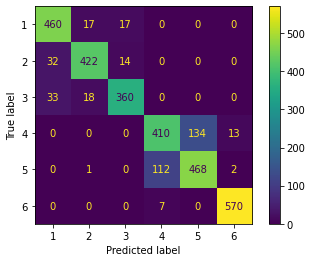

In [23]:
seed(1)
set_seed(2)
autoencoder_1 = deep_encoder(input_dim=x_train.shape[1], code_dim=code_dim)
autoencoder_1.summary()

code_modelenc = keras.models.Model(inputs=autoencoder_1.input, outputs=autoencoder_1.get_layer('code').output)
code_train = np.asarray(code_modelenc.predict(x_train))

from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

clf2 = svm.SVC(C=1, kernel="linear", random_state=1)
clf2.fit(code_train, y_train)
code_test = np.asarray(code_modelenc.predict(x_test))

print('Calculando score...')
score = clf2.score(code_test, y_test)
print('\nscore: %.2f ' % (score))

disp = plot_confusion_matrix(clf2, code_test, y_test)

### Parte 2 - Exercícios complementares

---
### Exercício 6)

Você treinou uma GAN, porém enquanto a perda do discriminador esteve sempre decrescente a perda do gerador cresceu no treino. Qual dos procedimentos abaixo tem a menor chance de auxiliar no treinamento:

a) Reduzir a taxa de aprendizado do discriminador<br>
<font color='red'>b) Aumentar a capacidade do discriminador e reduzir a do gerador<br></font>
c) Regularizar ou aumentar a regularização do discriminador<br>
d) Fazer mais de uma atualização do gerador para cada atualização dos pesos do discriminador<br>

**Justificativa**: A alternativa (a) reduz a velocidade de aprendizado do discriminador, em certo sentido estabilizando o treinamento do gerador, que agora tem que "vencer" uma rede mais estática no sentido de velocidade de atualização dos parâmetros; (c) reduz a capacidade de ajuste aos dados reais do discriminador, dando mais espaço para que o gerador consiga bons gradientes no treino; (d) d novamente estabiliza o treinamento do gerador, por um motivo similar ao da letra (a). A (b) não auxiliaria, e na verdade poderia até piorar a situação, pois a tarefa do gerador é mais difícil do que a do discriminador. Ao deixar o discriminador mais complexo e o gerador mais restrito, essa dificuldade se amplifica.

---

### Exercício 7)

Uso de GANs para aprendizado de representações. Utilizando a mesma base de dados do exercício anterior, projete e treine uma GAN para gerar exemplos artificiais da base de dados `smartphone_activity_dataset.csv`. Utilizaremos todos os exemplos para treinamento da GAN.

Para isso, utilize a GAN similar à proposta em aula, alterada conforme o código abaixo, com as seguintes configurações:
* discriminador com uma camada oculta com 32 dimensões (utilize o parâmetro `name='embedding'` nessa camada para facilitar seu uso posterior), deve ser treinado com Adam e taxa de aprendizado 0.0001 (apenas para o discriminador)
* gerador com 2 camadas ocultas com 256 neurônios
* dimensão de z = 256
* dimensão de entrada igual a da base de dados
* função de distribuição alvo deve amostrar da base de dados

Todas as camadas serão `tanh` exceto a camada de saída do discriminador que é `sigmoid`.

Treine a GAN por 1000 épocas com batch size 32 e otimizador Adam com lr=0.001.

Após, utilize a camada "embedding" do discriminador como extratora de características, passando os dados da base de treinamento e teste (na mesma divisão feita na questão anterior) para o discriminador, e pegando a projeção feita pela camada densa. 

Treine classificadores SVM com parâmetros C=1, kernel="linear" e random_state=1, um na base de dados com suas características originais, e o outro nas característias do "embedding" do discriminador. Obtenha o score nos respectivos conjuntos de teste. Os resultados estão em qual intervalo? 

(a) Original = [92,100], Embedding 32d GAN = [92,97], a GAN foi capaz de aprender uma boa representação compacta com acurácia próxima da original sendo a quantidade de épocas suficiente para esse aprendizado<br>
(b) Original = [85,91], Embedding 32d GAN = [82,89], a GAN produz representação similar aos dados originais, porém com menor dimensionalidade, indicando que houve convergência<br>
(c) Original = [85,91], Embedding 32d GAN = [23,30], a GAN gera uma representação que produz classificação próxima da aleatória<br>
<font color='red'>(d)  Original = [92,100], Embedding 32d GAN = [82,89], a GAN gera uma representação compacta com resultado abaixo da original, sendo necessário executar por mais épocas para investigar se é capaz de gerar uma representação mais fiel aos dados<br></font>

 **Justificativa**: Ver código abaixo.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed

In [25]:
# modelo discriminador base : classificador
def discriminator(dim_input=2, embedding_size=128):
    model = models.Sequential()
    model.add(layers.Dense(embedding_size, activation='tanh', name='embedding', input_dim=dim_input))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    return model

def distribuicao_alvo(n, x_train):
    labels_reais = np.ones((n,1))
    return x_train[np.random.choice(x_train.shape[0], n, replace=False), :], labels_reais

# modelo gerador, cuja entrada tem dimensão do espaço latente
# sua saída tem dimensão igual a dos exemplos da distribuição alvo
def generator(z_dim, dim_output=2, embedding_size1=256, embedding_size2=256):
    model = models.Sequential()
    model.add(layers.Dense(embedding_size1, activation='tanh', name='embedding1', input_dim=z_dim))
    model.add(layers.Dense(embedding_size2, activation='tanh', name='embedding2'))
    model.add(layers.Dense(dim_output, activation='tanh'))
    return model

# funcao para gerar uma amostra com n exemplos da distribuicao latente
def amostra_distribuicao_latente(z_dim, n):
    exemplos_z = np.random.randn(z_dim * n)
    return exemplos_z.reshape(n, z_dim)

# funcao para gerar exemplos "falsos", aleatorios a partir da
# saída do gerador G(z)
def gera_exemplos_falsos(model_g, z_dim, n):
    exemplos_z = amostra_distribuicao_latente(z_dim, n)
    exemplos_falsos = model_g.predict(exemplos_z)
    labels_falsos = np.zeros((n,1))
    return exemplos_falsos, labels_falsos

In [26]:
def GAN(model_gen, model_dis):
    # o discriminador sera treinado separadamente, entao marcamos como
    # nao treinável dentro desse modelo
    model_dis.trainable = False

    # criamos modelo que gera exemplos, depois os passa ao discriminador
    model_gan = models.Sequential()
    model_gan.add(model_gen)
    model_gan.add(model_dis)
    model_gan.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model_gan

def fit_GAN(model_gen, model_dis, model_GAN, z_dim, x_train, epochs=1000, batch_size=32, verbose=False):
    histR = np.zeros(epochs)
    histF = np.zeros(epochs)
    for i in range(epochs):
        # amostra exemplos para o discriminador
        x_real, y_real = distribuicao_alvo(batch_size//2, x_train)
        x_falso, y_falso = gera_exemplos_falsos(model_gen, z_dim, batch_size//2)
        # treina modelo em meio batch
        model_dis.train_on_batch(x_real, y_real)
        model_dis.train_on_batch(x_falso, y_falso)

        # exemplos da distribuicao latente
        z_batch = amostra_distribuicao_latente(z_dim, batch_size)
        # invertemos os labels aqui para treinar de forma a enganar o discriminador
        z_labels = np.ones((batch_size,1))
        model_GAN.train_on_batch(z_batch, z_labels)

        # avalia modelo discriminador atual
        loss_real, acc_real = model_dis.evaluate(x_real, y_real, verbose=0)
        loss_falso, acc_falso = model_dis.evaluate(x_falso, y_falso, verbose=0)
        histR[i] = loss_real
        histF[i] = loss_falso
        if (verbose and (i % 100 == 0)):
            print("Epoch: %d, Accuracy- real: %.2f falso: %.2f" % (i, acc_real, acc_falso))
            
    return histR, histF

In [27]:
seed(1)
set_seed(2)

z_dim = 256
model_dis = discriminator(features.shape[1], embedding_size=32) 
model_gen = generator(z_dim,features.shape[1], embedding_size1=256, embedding_size2=256)

model_GAN = GAN(model_gen, model_dis)

histR, histF = fit_GAN(model_gen, model_dis, model_GAN, z_dim, features, epochs=1000, batch_size=32, verbose=True)

/home/maponti/.virtualenvs/rn21/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch: 0, Accuracy- real: 0.12 falso: 0.56
Epoch: 100, Accuracy- real: 1.00 falso: 0.00
Epoch: 200, Accuracy- real: 1.00 falso: 0.00
Epoch: 300, Accuracy- real: 1.00 falso: 0.00
Epoch: 400, Accuracy- real: 1.00 falso: 0.94
Epoch: 500, Accuracy- real: 0.94 falso: 0.31
Epoch: 600, Accuracy- real: 1.00 falso: 0.69
Epoch: 700, Accuracy- real: 1.00 falso: 0.44
Epoch: 800, Accuracy- real: 1.00 falso: 0.75
Epoch: 900, Accuracy- real: 1.00 falso: 0.75


In [28]:
code_GAN = keras.models.Model(inputs=model_dis.input, outputs=model_dis.get_layer('embedding').output)
code_trainGAN = np.asarray(code_GAN.predict(x_train))
code_testGAN = np.asarray(code_GAN.predict(x_test))

Calculando score embedding GAN...

score: 0.85


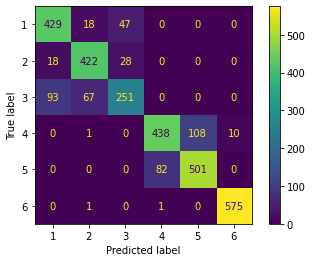

In [29]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

clf = svm.SVC(C=1, random_state=1, kernel="linear")
clf.fit(code_trainGAN, y_train)

print('Calculando score embedding GAN...')
score = clf.score(code_testGAN, y_test)
print('\nscore: %.2f' % (score))

disp = plot_confusion_matrix(clf, code_testGAN, y_test)

Calculando score dados originais...

score: 0.9883495145631068


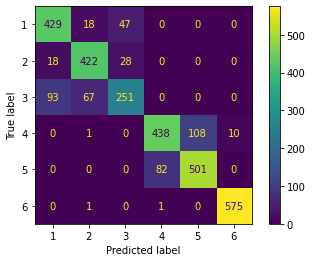

In [30]:
clf_orig = svm.SVC(C=1, random_state=1, kernel="linear")
clf_orig.fit(x_train, y_train)

print('Calculando score dados originais...')
score = clf_orig.score(x_test, y_test)
print('\nscore: ' + str(score))

disp = plot_confusion_matrix(clf, code_testGAN, y_test)

---

### Exercício 8)

Interpolação utilizando código autoencoder. 

Crie um Autoencoder profundo do tipo Denoising Undercomplete para imagens da base de dados MNIST.

Para tornar o treinamento mais rápido utilizaremos apenas as 3000 primeiras imagens da base de dados de treinamento. Crie uma versão ruidosa do conjunto de treinamento conforme indicado no código.

O Autoencoder deve possuir a seguinte arquitetura no encoder (todas as camadas com ativação relu):

* Conv2D com 32 filtros 3x3, strides 2, zeropadding
* Conv2D com 32 filtros 3x3, strides 2, sem zeropadding
* MaxPooling2D com poolsize=2
* Densa com 32 dimensões (utilize name='code' para facilitar)

A seguir, deve possuir um decoder espelhado (com convoluções transpostas e upsampling), resultando na saida de mesma dimensão da entrada.

Antes de instanciar o modelo, inicialize as sementes com seed(1), set_seed(2). Depois, compile e treine com perda MSE, Otimizador SGD, taxa 0.01, momentum 0.95, por 25 épocas com batchsize 32.

Vamos agora obter interpolações de imagens utilizando os seus códigos. Para isso crie dois modelos, com base no treinado:

1. Encoder, que permite recuperar o código de uma imagem (camada 'code')
2. Decoder, que permite receber um código e retornar uma imagem

O segundo é mais complexo, exige que seja feita a montagem das camadas utilizando a seguinte instrução (estude com calma para entender):

In [14]:
## cria nova camada de entrada para receber dimensionalidade do código
#input_code_layer = keras.layers.Input(shape=(code_dim))

## encadeia camadas a partir de 'inicio', nesse caso 6 - ajuste conforme necessário
#inicio = 6
#x = input_code_layer
#for layer in convae.layers[inicio:]:
#    x = layer(x)
    
#decoder = keras.models.Model(inputs=input_code_layer, outputs=x)

Obtenha as imagens de teste de índice 128 e 198, e então:
1. calcule seus códigos pelo encoder: code128 e code198;
2. gere interpolações 10 lineares entre code128 e code198 combinando linearmente cada dimensão do vetor com ponderações entre 0 (que resulta apenas na imagem 128) e 1 (que resulta apenas na imagem 198);
3. passe cada vetor interpolado pelo decoder, obtendo imagens intermediárias;

OBS: os modelos esperam arrays em formatos específicos para predição, para passar uma única imagem use `model.predict(np.array([x_test[indice_imagem],]))`

Quais das imagens abaixo representa a saída da interpolação?

(a) <img src="ex5_8_alternativa_a.png" width=620></img><br>
(b) <img src="ex5_8_alternativa_b.png" width=620></img><br>
<font color='red'>(c)</font> <img src="ex5_8_alternativa_c.png" width=620></img><br>
(d) <img src="ex5_8_alternativa_d.png" width=620></img><br>

Dataset size:
60000 train samples
10000 test samples


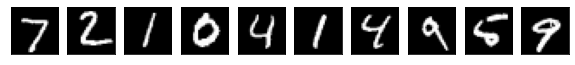

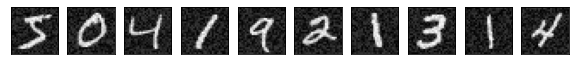

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# os pixels das imagens sao reescalados para melhor processamento
# em particular divide-se por 255 para que os valores fiquem entre 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print('Dataset size:')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

img_rows, img_cols = x_train.shape[1], x_train.shape[2]
input_shape = (img_rows, img_cols, 1, )
n_classes = 10

n=10
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

seed(1)
set_seed(2)

## gerando dados ruidosos a serem oferecidos na entrada (a saída deve ser x_train[:3000])
noisy_train = x_train[:3000] + np.random.random(x_train[:3000].shape)*0.3

n=10
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(noisy_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [4]:
def conv_autoencoder(input_shape, code_dim=10):
    input_img = keras.layers.Input(shape=(input_shape))

    # encoder
    ## conv.layers
    x1 = keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2, 2), padding='same', activation='relu')(input_img)
    x2 = keras.layers.Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu')(x1)
    x2p = keras.layers.MaxPooling2D(pool_size=(2, 2))(x2)
    ## achatando
    x2f = keras.layers.Flatten()(x2p)
    #código
    z = keras.layers.Dense(code_dim, activation='relu', name='code')(x2f)

    # decoder
    ## projetando num espaco de maior dimensionalidade e redimensionando
    x2f_hat = keras.layers.Dense(1152, activation='relu', name='input_decoder')(z)
    x2r_hat = keras.layers.Reshape((6, 6, 32))(x2f_hat)
    ## invertendo o pooling
    x2p_hat = keras.layers.UpSampling2D((2,2))(x2r_hat)
    ## convolucao transpostas (inversas)
    x2_hat = keras.layers.Conv2DTranspose(32, kernel_size=(3,3), padding='valid', activation='relu')(x2p_hat)
    x1_hat = keras.layers.Conv2DTranspose(1, kernel_size=(3,3), strides=(2, 2), padding='same', activation='relu')(x2_hat)

    autoencoder = keras.models.Model(input_img, x1_hat)
    autoencoder.summary()
    return autoencoder

In [6]:
epochs= 25
batch_size=32
code_dim= 32

seed(1)
set_seed(2)

convae = conv_autoencoder(input_shape, code_dim)
convae.compile(loss='mse',
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.95))

hist_ae = convae.fit(noisy_train, x_train[:3000], batch_size=batch_size, epochs=epochs)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
code (Dense)                 (None, 32)                36896     
_________________________________________________________________
input_decoder (Dense)        (None, 1152)              3801

In [7]:
encoder = keras.models.Model(inputs=convae.input, outputs=convae.get_layer('code').output)

In [8]:
input_code_layer = keras.layers.Input(shape=(code_dim))
x = input_code_layer
for layer in convae.layers[6:]:
    x = layer(x)
decoder = keras.models.Model(inputs=input_code_layer, outputs=x)

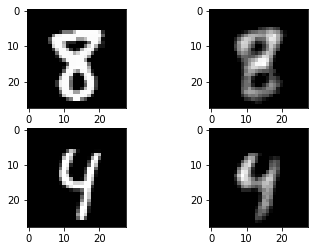

[0.         2.451859   0.         0.         3.3732865  1.5821608
 2.3452983  2.1332502  3.0689702  1.031507   1.2072502  3.2297895
 0.         1.0624743  0.         0.         0.78216934 1.2478688
 0.         3.017116   1.5830498  0.41204554 0.12851675 2.528858
 1.8534098  0.         3.9204488  3.881935   0.         0.7408432
 0.0848839  0.        ]
[0.         1.3582106  0.01117879 0.         2.3049433  1.6490667
 1.4180238  1.2436894  0.5886005  0.         1.1757739  0.20179856
 0.         0.         0.         0.         1.0681517  0.03522725
 0.         0.953698   1.6357334  0.         0.         1.9931356
 1.6766431  0.         1.7632565  2.7139013  0.         0.76896375
 0.42384875 0.        ]


In [9]:
img1 = 128
x_test_dec1 = convae.predict(np.array([x_test[img1],]))
img2 = 198
x_test_dec2 = convae.predict(np.array([x_test[img2],]))

plt.subplot(221); plt.imshow(x_test[img1].reshape(28, 28), cmap="gray")
plt.subplot(222); plt.imshow(x_test_dec1[0].reshape(28, 28), cmap="gray")
plt.subplot(223); plt.imshow(x_test[img2].reshape(28, 28), cmap="gray")
plt.subplot(224); plt.imshow(x_test_dec2[0].reshape(28, 28), cmap="gray")
plt.show()

code_img1 = encoder.predict(np.array([x_test[img1],]))[0]
code_img2 = encoder.predict(np.array([x_test[img2],]))[0]
print(code_img1)
print(code_img2)

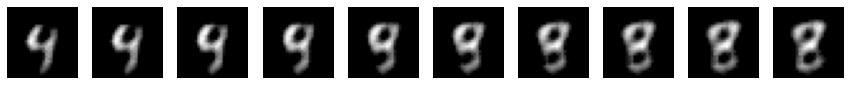

In [10]:
values = np.linspace(0,1,10)
    
plt.figure(figsize=(15, 4))
j = 0
for x in values:
    j = j + 1
    alt_code = np.array(code_img1, copy=True)
    alt_code = (alt_code*(x))  + (code_img2*(1-x))
    alt_img = decoder.predict(np.array([alt_code,]))
    plt.subplot(1,10,j)
    # a depender da forma como foi implementado talvez necessite inserir dimensao 0
    #plt.imshow(alt_img[0][:,:,0], cmap="gray"); plt.axis('off')
    plt.imshow(alt_img[0][:,:,0], cmap="gray"); plt.axis('off')